In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

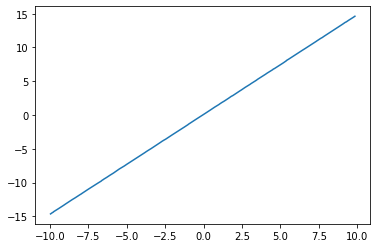

In [4]:
data = []

for i in range(100):
    x = np.random.uniform(-10., 10.)
    eps = np.random.normal(0., 0.01)
    y = 1.477 * x + 0.089 + eps
    data.append([x,y])

data = np.sort(np.array(data),0)
plt.plot(data[:,0],data[:,1])

In [12]:
def mse(b, w, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (w * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, w_current, points, lr):
    b_gradient = 0
    w_gradient = 0
    M = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += (2/M) * ((w_current * x + b_current) - y)
        w_gradient += (2/M) * x * ((w_current * x + b_current) - y)
    new_b = b_current - (lr * b_gradient)
    new_w = w_current - (lr * w_gradient)
    return [new_b, new_w]

def gradient_descent(points, starting_b, starting_w, lr, num_iterations):
    b = starting_b
    w = starting_w
    for step in range(num_iterations):
        b, w = step_gradient(b, w, np.array(points), lr)
        loss = mse(b, w, points)
        if step%50 == 0:
            print(f"iteration:{step}, loss:{loss}, w:{w}, b:{b}")
    return [b, w]

def main():
    lr = 0.01
    initial_b = 0
    initial_w = 0
    num_iterations = 1000
    [b, w] = gradient_descent(data, initial_b, initial_w, lr, num_iterations)
    loss = mse(b, w, data)
    print(f"Final loss:{loss}, w:{w}, b:{b}")
    
main()

iteration:0, loss:7.918481019263495, w:0.9908124806662317, b:-0.0016770446266420015
iteration:50, loss:0.0011949419027267206, w:1.4765311370236944, b:0.054022835371154015
iteration:100, loss:0.00025591923013874277, w:1.4766054598407337, b:0.074943934155516
iteration:150, loss:0.0001312819925833696, w:1.4766325373074365, b:0.08256595896954554
iteration:200, loss:0.00011473879140312428, w:1.476642402234955, b:0.08534283330413384
iteration:250, loss:0.00011254299895250674, w:1.4766459962489744, b:0.08635451081217632
iteration:300, loss:0.00011225154964752073, w:1.4766473056287694, b:0.08672308758481985
iteration:350, loss:0.00011221286534593894, w:1.476647782665152, b:0.08685736835735092
iteration:400, loss:0.0001122077307473526, w:1.4766479564601895, b:0.08690628984999467
iteration:450, loss:0.00011220704922793705, w:1.476648019777614, b:0.08692411304535905
iteration:500, loss:0.00011220695876931195, w:1.4766480428455695, b:0.08693060643457977
iteration:550, loss:0.00011220694676266808, 